# What are  the most demanded skills for the top 3 most popular data roles?

## Methodology
1. Clean-up the skill coulumn
2. Calculate skill count base on ``job_title_short``
3. Visualise skill count for my jobs of intest
4. Calculate skill percentage
5. Visualise skill count for my jobs of intest
6. Plot final findings

## 1. Clean-up the skill column

In [2]:
# Importing libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) #Skills from string to column

## 2. Calculate skill count base on ``job_title_short``

In [23]:
# Filter for Poland roles
df_PL = df[df['job_country']=='Poland']

#

In [24]:
# Calculate a number of skills per every position
df_skills =df_PL.explode('job_skills')
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size().reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

## 3. Visualise skill count for my jobs of intest

In [38]:
# Jobs of my interest
job_list=['Data Analyst', 'Business Analyst', 'Data Scientist']
job_list.sort()

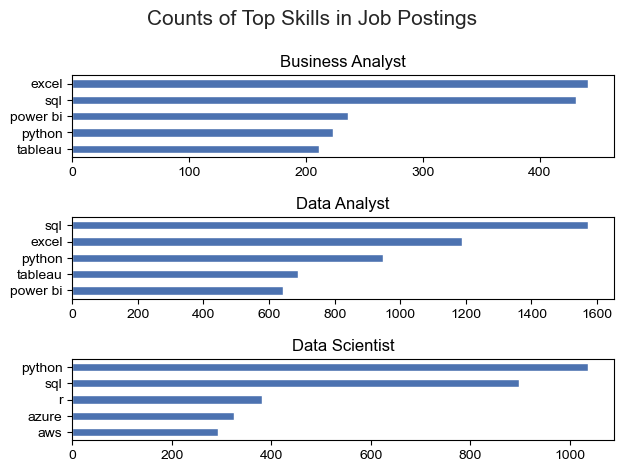

In [48]:
# Plot number of skills
fig, ax = plt.subplots(len(job_list),1)
sns.set_theme(style='ticks')

for i, job_title in enumerate(job_list):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()

## 4. Calculate skill percentage


In [53]:
# Count all job postings from poland
df_job_title_count = df_PL['job_title_short'].value_counts().reset_index(name='jobs_total')

In [61]:
df_skills_percet = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skills_percet['skill_percent'] = 100 * (df_skills_percet['skill_count'] / df_skills_percet['jobs_total'])

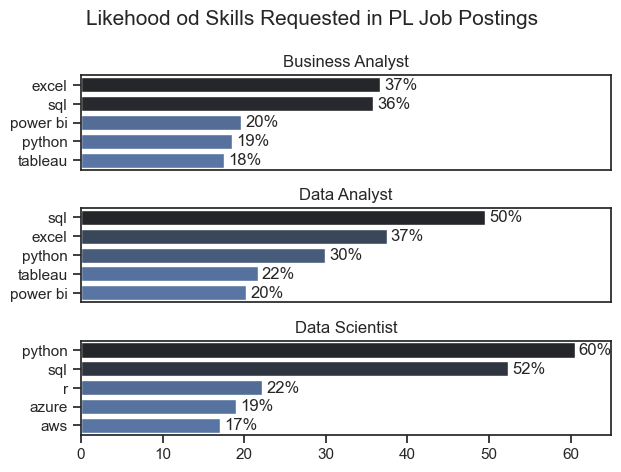

In [94]:
# Plot procentage of skills
fig, ax = plt.subplots(len(job_list),1)
sns.set_theme(style='ticks')

for i, job_title in enumerate(job_list):
    df_plot = df_skills_percet[df_skills_percet['job_title_short']==job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,65)

    for n, value in enumerate(df_plot['skill_percent']):
        ax[i].text(value + 0.5, n, s=f'{value:.0f}%', va='center')
    
    if i != len(job_list)-1:
        ax[i].set_xticks([])


fig.suptitle('Likehood od Skills Requested in PL Job Postings', fontsize=15)
fig.tight_layout()
plt.show()